In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

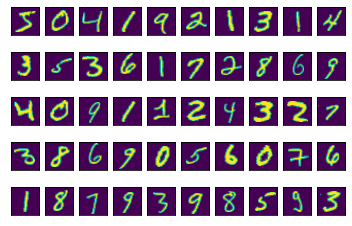

In [7]:
for digit_num in range(0,50):
    plt.subplot(5,10, digit_num+1)
    mat_data = X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data)
    plt.xticks([])
    plt.yticks([])

In [8]:
y_train[0:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad

In [51]:
model = Sequential()

In [52]:
# First Hidden Layer
model.add(Dense(units=128, 
                activation='relu', 
                input_shape=(784,)))

# Second Hidden Layer
model.add(Dense(units=64, 
                activation='relu'))
# Third Hidden layer
model.add(Dense(units=32, 
                activation='relu'))

# Output Layer
model.add(Dense(units=10, 
                activation='softmax'))

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer=RMSprop(learning_rate=0.01), 
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
es = EarlyStopping(monitor='accuracy', patience=1)

In [58]:
result = model.fit(X_train, 
                   y_train,
                   #validation_data=(X_test,y_test),
                   callbacks=[es],
                   epochs=25)

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3927 - accuracy: 0.9003
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3497 - accuracy: 0.9339
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.9237


In [ ]:
model.predict(X_train)

In [ ]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)

In [ ]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

In [ ]:
y_train_pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

In [ ]:
history = pd.DataFrame(result.history)

In [ ]:
history.head()

In [ ]:
plt.figure(figsize = (15,4))
plt.plot(history.loss, label='Loss')
plt.plot(history.accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()